In [18]:
# 1) Data Preprocessing - Advertising Dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('Advertising.csv')
print('Dataset shape:', dataset.shape)
display(dataset.head())

# Separate features and target
X = dataset.iloc[:, :-1].values   # TV, Radio, Newspaper
y = dataset.iloc[:, -1].values    # Sales

print('\nFeature preview (first 5 rows):')
print(X[:5])

print('\nFinal feature shape:', X.shape)
print('Target shape:', y.shape)



Dataset shape: (200, 4)


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9



Feature preview (first 5 rows):
[[230.1  37.8  69.2]
 [ 44.5  39.3  45.1]
 [ 17.2  45.9  69.3]
 [151.5  41.3  58.5]
 [180.8  10.8  58.4]]

Final feature shape: (200, 3)
Target shape: (200,)


In [20]:
# Splitting into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

print('Training samples:', X_train.shape[0])
print('Test samples:', X_test.shape[0])
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)
print('Intercept:', regressor.intercept_)
print('Number of coefficients:', len(regressor.coef_))
print('Coefficients:', regressor.coef_)

Training samples: 160
Test samples: 40
Intercept: 4.77320520326983
Number of coefficients: 3
Coefficients: [ 0.05368006  0.11152624 -0.00351166]


In [21]:
# Predicting Test set results
y_pred = regressor.predict(X_test)

# Compare Actual vs Predicted
comparison = pd.DataFrame({
    'Actual Sales': y_test,
    'Predicted Sales': np.round(y_pred, 2)
})

display(comparison.reset_index(drop=True))


,Actual Sales,Predicted Sales
0,11.3,10.71
1,8.4,8.69
2,12.0,9.58
3,25.4,24.86
4,16.7,14.66
5,8.7,8.32
6,7.2,10.43
7,18.2,18.45
8,9.2,9.73
9,16.6,17.93


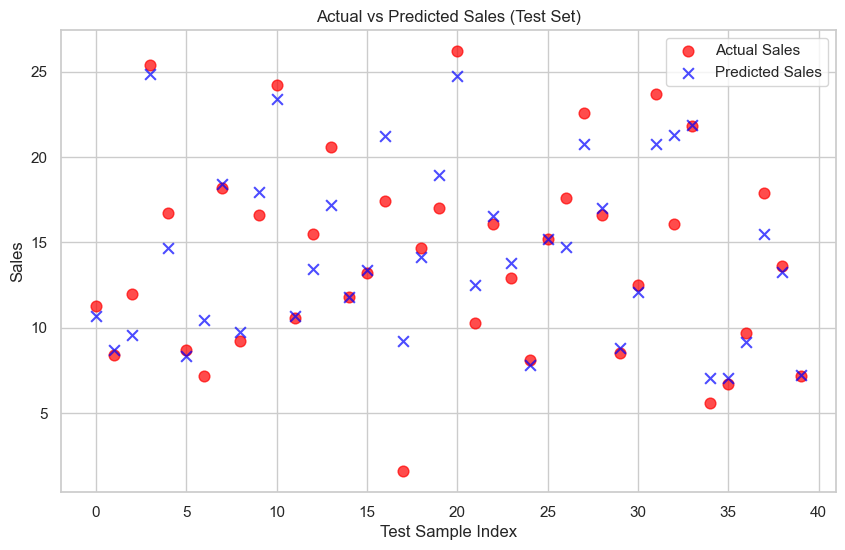

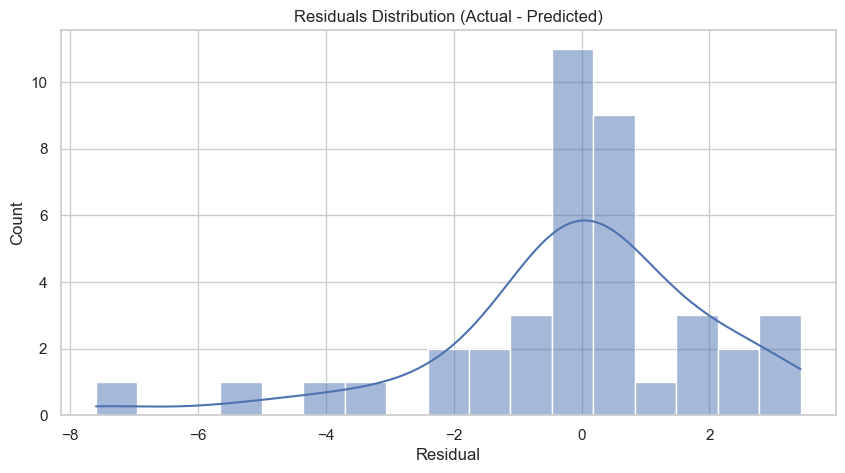

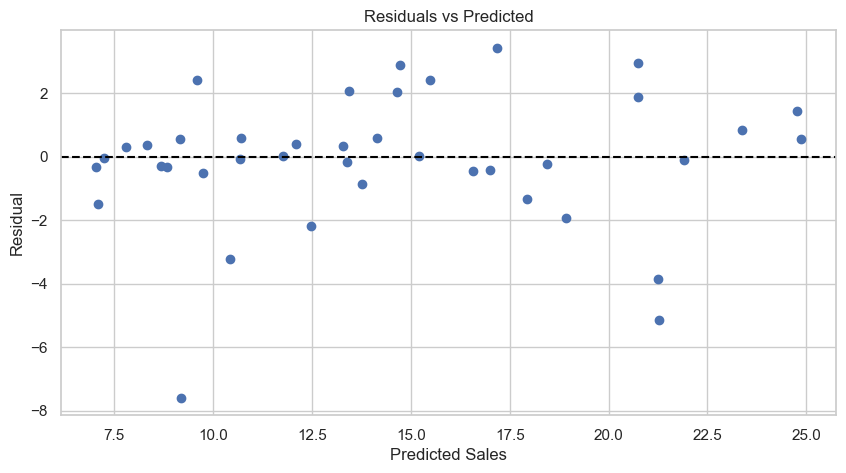

In [24]:
# ===============================
# 4) Visualization
# ===============================

# Actual vs Predicted Sales
plt.figure(figsize=(10,6))
plt.scatter(range(len(y_test)), y_test, color='red',
            label='Actual Sales', alpha=0.7, s=60)
plt.scatter(range(len(y_pred)), y_pred, color='blue',
            label='Predicted Sales', alpha=0.7, marker='x', s=60)

plt.title('Actual vs Predicted Sales (Test Set)')
plt.xlabel('Test Sample Index')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Residuals distribution
residuals = y_test - y_pred

plt.figure(figsize=(10,5))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution (Actual - Predicted)')
plt.xlabel('Residual')
plt.show()

# Residuals vs Predicted
plt.figure(figsize=(10,5))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residuals vs Predicted')
plt.xlabel('Predicted Sales')
plt.ylabel('Residual')
plt.show()


In [23]:
# ===============================
# 5) Evaluation Metrics & Sample Prediction
# ===============================

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R² Score: {r2:.4f}')

# Sample prediction
# Given: TV = 150, Radio = 20, Newspaper = 30
sample_budget = np.array([[150, 20, 30]])
predicted_sales = regressor.predict(sample_budget)

print('\nPredicted Sales for given advertising budget:', predicted_sales[0])


Mean Squared Error (MSE): 4.52
Mean Absolute Error (MAE): 1.42
R² Score: 0.8645

Predicted Sales for given advertising budget: 14.950388344297032


Business recommendation:

Increase TV & Radio budget

Reduce Newspaper spend

Technical improvement:

Polynomial regression

Feature scaling

Add seasonal/extra features